In [ ]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import fft
from scipy.fft import fftfreq
import numpy as np

In [ ]:
fs1, signal1 = wavfile.read('/content/sample_1.wav')
fs2, signal2 = wavfile.read('/content/sample_2.wav')
fs3, signal3 = wavfile.read('/content/sample_3.wav')
fs4, signal4 = wavfile.read('/content/sample_4.wav')
fs5, signal5 = wavfile.read('/content/sample_5.wav')


In [ ]:
def plot_time_domain(fs,signal,ID):
  t = np.linspace(0, len(signal) / fs, num=len(signal))
  plt.plot(t,signal)
  plt.title("time domain : sample_"+str(ID))
  plt.show()

# Time Domain

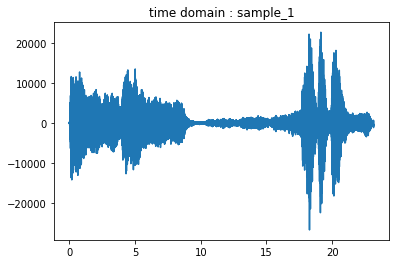

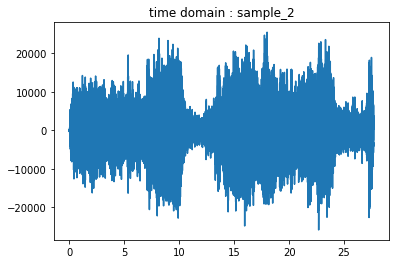

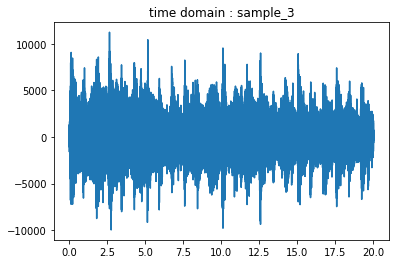

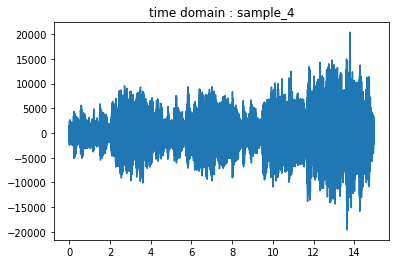

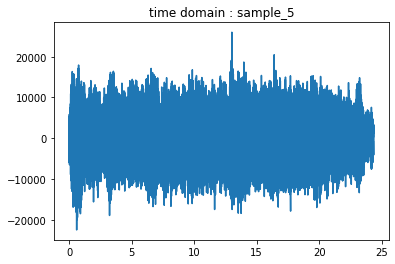

In [ ]:
plot_time_domain(fs1,signal1,1)
plot_time_domain(fs2,signal2,2)
plot_time_domain(fs3,signal3,3)
plot_time_domain(fs4,signal4,4)
plot_time_domain(fs5,signal5,5)

# Fourier Transform

In [ ]:
def fourier_transform(signal,ID):
  plt.plot(fft(signal))
  plt.title('frequency domain: sample_'+ str(ID))
  plt.axis([299800, 301000,-200000,200000])
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


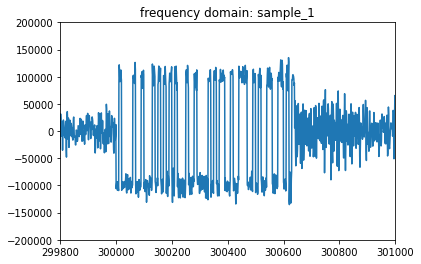

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


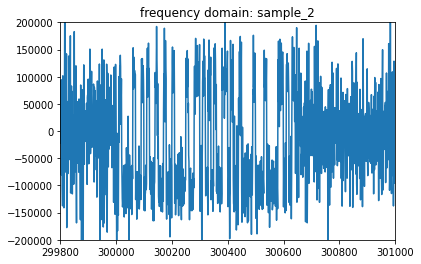

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


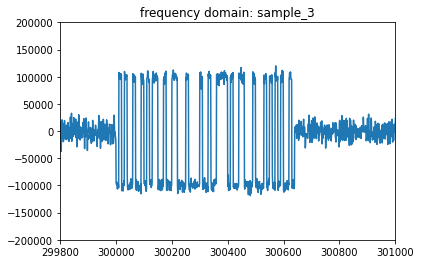

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


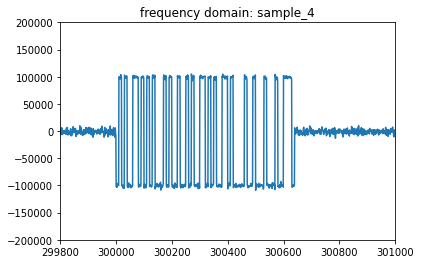

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


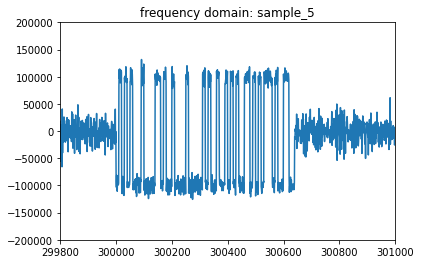

In [ ]:
fourier_transform(signal1,1)
fourier_transform(signal2,2)
fourier_transform(signal3,3)
fourier_transform(signal4,4)
fourier_transform(signal5,5)

In all samples, the code is hidden between 300000 and 300640 Hz.
*(300640-300000)/64= 10Hz
We are looking for 64 bits so the value of a 10 Hz interval will give us one binary number
 

getting the 64 bits

In [160]:
def get_64_bits(signal):
  s=fft(signal)
  sixty_four_bits=[]
  for i in range(64):
    if s[300005+10*i]>0:
      sixty_four_bits.append(1)
    else:
      sixty_four_bits.append(0)
  return sixty_four_bits


grouping the 64 bits 8 by 8

In [161]:
def get_8_bits(index,bit64):
  tmp=0
  for i in range(8):
    tmp=tmp+bit64[index*8+i]*(2**(7-i))
  
  return tmp


converts array of charachters to string

In [159]:
def convert(s): 
  
    # initialization of string to "" 
    new = "" 
  
    # traverse in the string  
    for x in s: 
        new += x  
  
    # return string  
    return new 

finds hidden codes in the signal using previous functions

In [162]:
def bin2dec(signal):
  eight_bits=[0,0,0,0,0,0,0,0]
  word=[0,0,0,0,0,0,0,0]
  sixty_four_bits=get_64_bits(signal)
  for i in range(8):
    eight_bits[i]=get_8_bits(i,sixty_four_bits)
  for j in range(8):
    word[j]=chr(eight_bits[j])
  return convert(word)
  


In [163]:
print(bin2dec(signal1))
print(bin2dec(signal2))
print(bin2dec(signal3))
print(bin2dec(signal4))
print(bin2dec(signal5))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  


BETHVNS5
BRHMSHD5
RVLBOLER
STRSSBDN
TCHAISWL


In [ ]:
chr(0)

'\x00'